In [18]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\cowin_vaccine_data_statewise.csv")
df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,27/10/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10689,28/10/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10690,29/10/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10691,30/10/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = df.set_index(['State'])
df = df.drop(['India'], axis = 0)
df = df.reset_index()

In [21]:
df

,State,Updated On,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,Andaman and Nicobar Islands,16/01/2021,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0
1,Andaman and Nicobar Islands,17/01/2021,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0
2,Andaman and Nicobar Islands,18/01/2021,42.0,9.0,2.0,42.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,13.0,0.0
3,Andaman and Nicobar Islands,19/01/2021,89.0,12.0,2.0,89.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,36.0,0.0
4,Andaman and Nicobar Islands,20/01/2021,124.0,16.0,3.0,124.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,West Bengal,27/10/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10400,West Bengal,28/10/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10401,West Bengal,29/10/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10402,West Bengal,30/10/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.columns

Index(['State', 'Updated On', 'Total Doses Administered', 'Sessions', 'Sites',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', 'Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years (Individuals Vaccinated)',
       '45-60 Years (Individuals Vaccinated)',
       '60+ Years (Individuals Vaccinated)', 'Male (Individuals Vaccinated)',
       'Female (Individuals Vaccinated)',
       'Transgender (Individuals Vaccinated)'],
      dtype='object')

In [22]:
doses_by_state = df.groupby(by = 'State', as_index = False).sum()
doses_by_state
doses_by_state = doses_by_state.set_index('State')
doses_by_state = doses_by_state.sort_values(by = 'First Dose Administered')

In [23]:
ruling_parties = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\ruling_parties.csv")
ruling_parties = ruling_parties.drop(columns = ['S.No.', 'Others'])
ruling_parties['State / Union Territory'] = ruling_parties['State / Union Territory'].replace({'Jammu and Kashmir[2]':'Jammu and Kashmir'})
ruling_parties = ruling_parties.rename(columns = {'State / Union Territory' : 'State'})
ruling_parties = ruling_parties.set_index(['State'])
ruling_parties

,Government,Opposition
State,,
Andhra Pradesh,YSRCP,TDP
Arunachal Pradesh,BJP+NPP[1],—
Assam,BJP+AGP+UPPL+BPF,INC+CPI(M)
Bihar,BJP+JD(U)+HAM,RJD+CPI(ML)L+CPI(M)+CPI
Chhattisgarh,INC,BJP
Delhi,AAP,BJP
Goa,BJP+MGP,INC+GFP
Gujarat,BJP,INC
Haryana,BJP+JJP+HLP,INC


In [24]:
doses_by_state

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
State,,,,,,,,,,,,,,,,,,,,,
Lakshadweep,9.543872e+06,1283856.0,2757.0,7.070067e+06,2.473805e+06,3.778953e+06,3.161515e+06,460.0,75.0,9.541722e+06,...,504.0,3.426900e+06,2.258554e+06,1.255474e+06,591777.0,925093.0,528243.0,1215081.0,909442.0,192.0
Ladakh,3.860091e+07,964479.0,6032.0,2.778852e+07,1.081238e+07,1.485682e+07,1.168278e+07,2826.0,910.0,3.857866e+07,...,777.0,1.445977e+07,6.752788e+06,5.329872e+06,3240510.0,3040285.0,2759736.0,5156509.0,4308849.0,931.0
Andaman and Nicobar Islands,3.967746e+07,1234591.0,5651.0,2.971288e+07,9.964583e+06,1.626504e+07,1.418247e+07,4061.0,0.0,3.964448e+07,...,615.0,1.308863e+07,1.159068e+07,5.772271e+06,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0
Sikkim,8.417496e+07,2215366.0,8807.0,6.291400e+07,2.126096e+07,3.483406e+07,2.912013e+07,21426.0,3239.0,8.413416e+07,...,47362.0,3.623589e+07,1.754867e+07,1.019105e+07,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0
Dadra and Nagar Haveli and Daman and Diu,7.866259e+07,5094186.0,14254.0,6.573604e+07,1.292655e+07,4.360010e+07,2.162589e+07,13489.0,3504.0,7.864350e+07,...,20499.0,4.735328e+07,1.347694e+07,4.409251e+06,5253085.0,4123599.0,1741440.0,7232714.0,4406202.0,1445.0
Puducherry,9.362830e+07,9519662.0,12409.0,7.440860e+07,1.921970e+07,3.572614e+07,3.688120e+07,14095.0,14098.0,9.358831e+07,...,3988.0,3.628646e+07,2.194713e+07,1.438784e+07,5471417.0,6712395.0,5125846.0,9113173.0,8645162.0,2317.0
Nagaland,9.731561e+07,4813675.0,24650.0,7.607637e+07,2.123924e+07,4.308790e+07,3.252669e+07,10987.0,3736.0,9.696939e+07,...,8473.0,4.589797e+07,1.971159e+07,1.001602e+07,6399551.0,6638742.0,3655521.0,10590660.0,7032326.0,1509.0
Mizoram,1.068867e+08,2957501.0,13831.0,8.228457e+07,2.460217e+07,4.145277e+07,4.087887e+07,13802.0,137.0,1.067770e+08,...,160604.0,4.452514e+07,2.330459e+07,1.451572e+07,4826364.0,8863596.0,5915492.0,10594236.0,9976825.0,1392.0
Arunachal Pradesh,1.119049e+08,4150155.0,28370.0,8.611796e+07,2.578698e+07,4.698376e+07,3.814915e+07,22263.0,1820.0,1.117682e+08,...,52124.0,5.088241e+07,2.475030e+07,9.522459e+06,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0


In [25]:
male_vs_female_doses = doses_by_state[['Male (Doses Administered)', 'Female (Doses Administered)']]

<AxesSubplot:xlabel='State'>

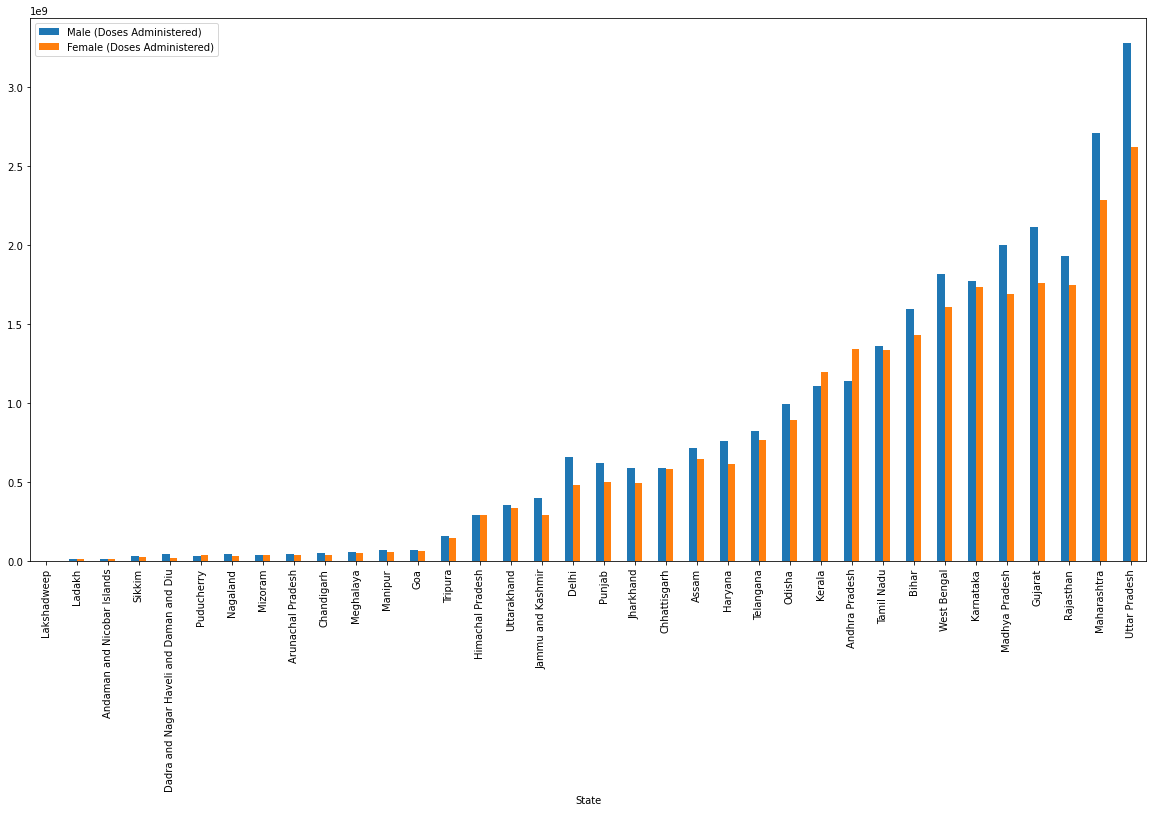

In [26]:
male_vs_female_doses.plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:>

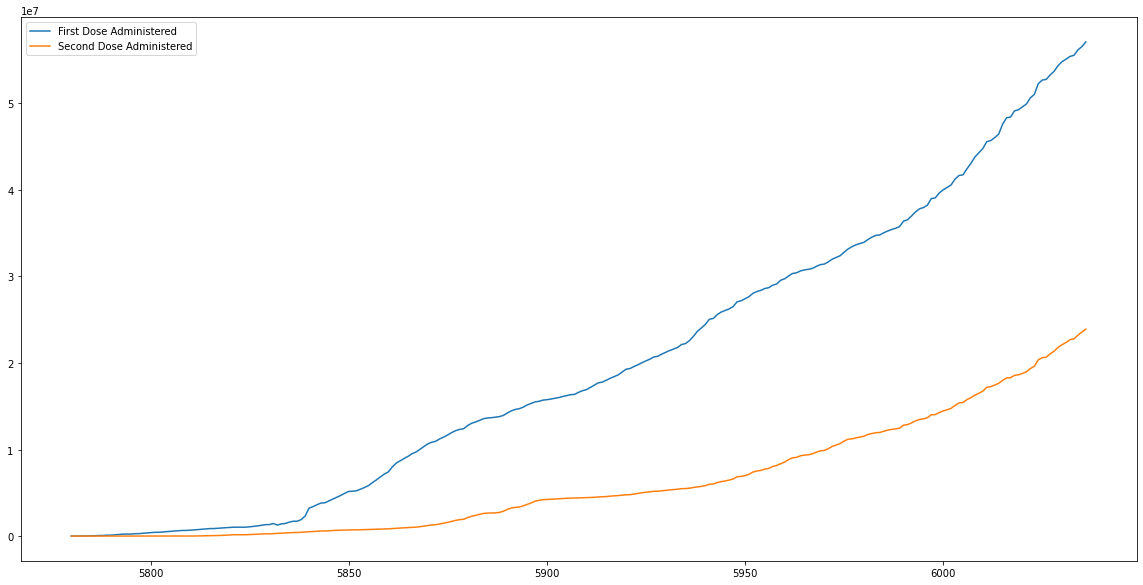

In [27]:
time_plot = df[['State', 'Updated On', 'First Dose Administered', 'Second Dose Administered']]
# time_plot = time_plot.set_index(['Updated On'])
# time_plot = time_plot.groupby(['State']).sum()
# plot = time_plot[['State', 'Updated On', 'First Dose Administered', 'Second Dose Administered']]
# plot
maharashtra_doses = time_plot[time_plot['State'] == 'Maharashtra']
maharashtra_doses.plot(kind = 'line', figsize = (20,10))

In [33]:
plot[plot['State'] == 'Tamil Nadu']

NameError: name 'plot' is not defined

In [34]:
def state_wise_vaccination(state):
    state_doses = time_plot[time_plot['State'] == state]
    state_doses.plot(kind = 'line')
#     state_doses.plot(kind = 'line', figsize = (20,10))

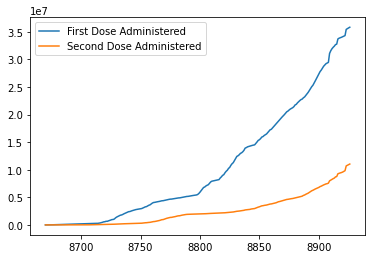

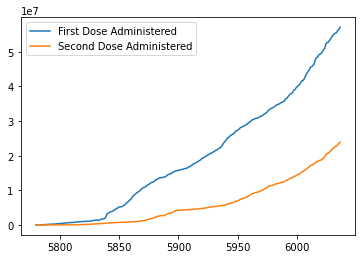

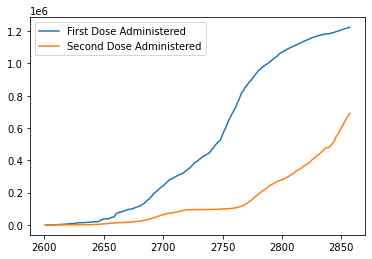

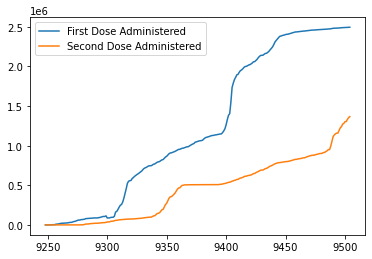

In [35]:
for state in ['Tamil Nadu', 'Maharashtra', 'Goa', 'Tripura']:
    state_wise_vaccination(state)

Joining state wise vaccination with ruling party

In [36]:
combined = pd.merge(doses_by_state, ruling_parties, left_on='State', right_index=True, how='inner')
combined = combined.reset_index()
combined

,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),Government,Opposition
0,Sikkim,8.417496e+07,2215366.0,8807.0,6.291400e+07,2.126096e+07,3.483406e+07,2.912013e+07,21426.0,3239.0,...,1.754867e+07,1.019105e+07,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0,SKM+BJP,—
1,Puducherry,9.362830e+07,9519662.0,12409.0,7.440860e+07,1.921970e+07,3.572614e+07,3.688120e+07,14095.0,14098.0,...,2.194713e+07,1.438784e+07,5471417.0,6712395.0,5125846.0,9113173.0,8645162.0,2317.0,AINRC+BJP,INC+DMK
2,Nagaland,9.731561e+07,4813675.0,24650.0,7.607637e+07,2.123924e+07,4.308790e+07,3.252669e+07,10987.0,3736.0,...,1.971159e+07,1.001602e+07,6399551.0,6638742.0,3655521.0,10590660.0,7032326.0,1509.0,NDPP+NPF+BJP,—
3,Mizoram,1.068867e+08,2957501.0,13831.0,8.228457e+07,2.460217e+07,4.145277e+07,4.087887e+07,13802.0,137.0,...,2.330459e+07,1.451572e+07,4826364.0,8863596.0,5915492.0,10594236.0,9976825.0,1392.0,MNF,ZPM
4,Arunachal Pradesh,1.119049e+08,4150155.0,28370.0,8.611796e+07,2.578698e+07,4.698376e+07,3.814915e+07,22263.0,1820.0,...,2.475030e+07,9.522459e+06,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0,BJP+NPP[1],—
5,Meghalaya,1.442872e+08,14426277.0,66686.0,1.149231e+08,2.936409e+07,5.861967e+07,5.267397e+07,14383.0,2275.0,...,3.197725e+07,1.319376e+07,9196351.0,11413151.0,5268632.0,14158601.0,13043905.0,2765.0,NPP+UDP+INC+PDF+BJP+HSPDP,AITC
6,Manipur,1.585337e+08,8412242.0,24859.0,1.284931e+08,3.004063e+07,6.843224e+07,5.773179e+07,31537.0,743.0,...,3.596613e+07,1.949696e+07,9858542.0,10185405.0,4939201.0,15398920.0,11250938.0,4407.0,BJP+NPP+JD(U)+NPF+KPA,INC
7,Goa,1.752044e+08,7976058.0,18295.0,1.355503e+08,3.965409e+07,7.325000e+07,6.309928e+07,12724.0,2946094.0,...,3.891502e+07,2.905117e+07,7514873.0,12191774.0,11403306.0,16425164.0,15687251.0,2369.0,BJP+MGP,INC+GFP
8,Tripura,4.338228e+08,30145870.0,107820.0,3.183074e+08,1.155155e+08,1.572182e+08,1.497774e+08,44725.0,6535184.0,...,1.131046e+08,5.980388e+07,13500603.0,48965819.0,27726999.0,48845211.0,44935091.0,12140.0,BJP+IPFT,CPI(M)
9,Himachal Pradesh,7.625689e+08,19555420.0,133354.0,5.914147e+08,1.711541e+08,2.936690e+08,2.896221e+08,122624.0,287143.0,...,1.906534e+08,1.406224e+08,17412755.0,68793840.0,59984689.0,74186948.0,76280181.0,24487.0,BJP,INC


In [37]:
ruling_party_vs_vaccination = combined[['State', 'Total Doses Administered', 'Government']]
ruling_party_vs_vaccination = ruling_party_vs_vaccination.set_index(['State', 'Government'])
ruling_party_vs_vaccination

,,Total Doses Administered
State,Government,
Sikkim,SKM+BJP,8.417496e+07
Puducherry,AINRC+BJP,9.362830e+07
Nagaland,NDPP+NPF+BJP,9.731561e+07
Mizoram,MNF,1.068867e+08
Arunachal Pradesh,BJP+NPP[1],1.119049e+08
Meghalaya,NPP+UDP+INC+PDF+BJP+HSPDP,1.442872e+08
Manipur,BJP+NPP+JD(U)+NPF+KPA,1.585337e+08
Goa,BJP+MGP,1.752044e+08
Tripura,BJP+IPFT,4.338228e+08


<AxesSubplot:ylabel='State,Government'>

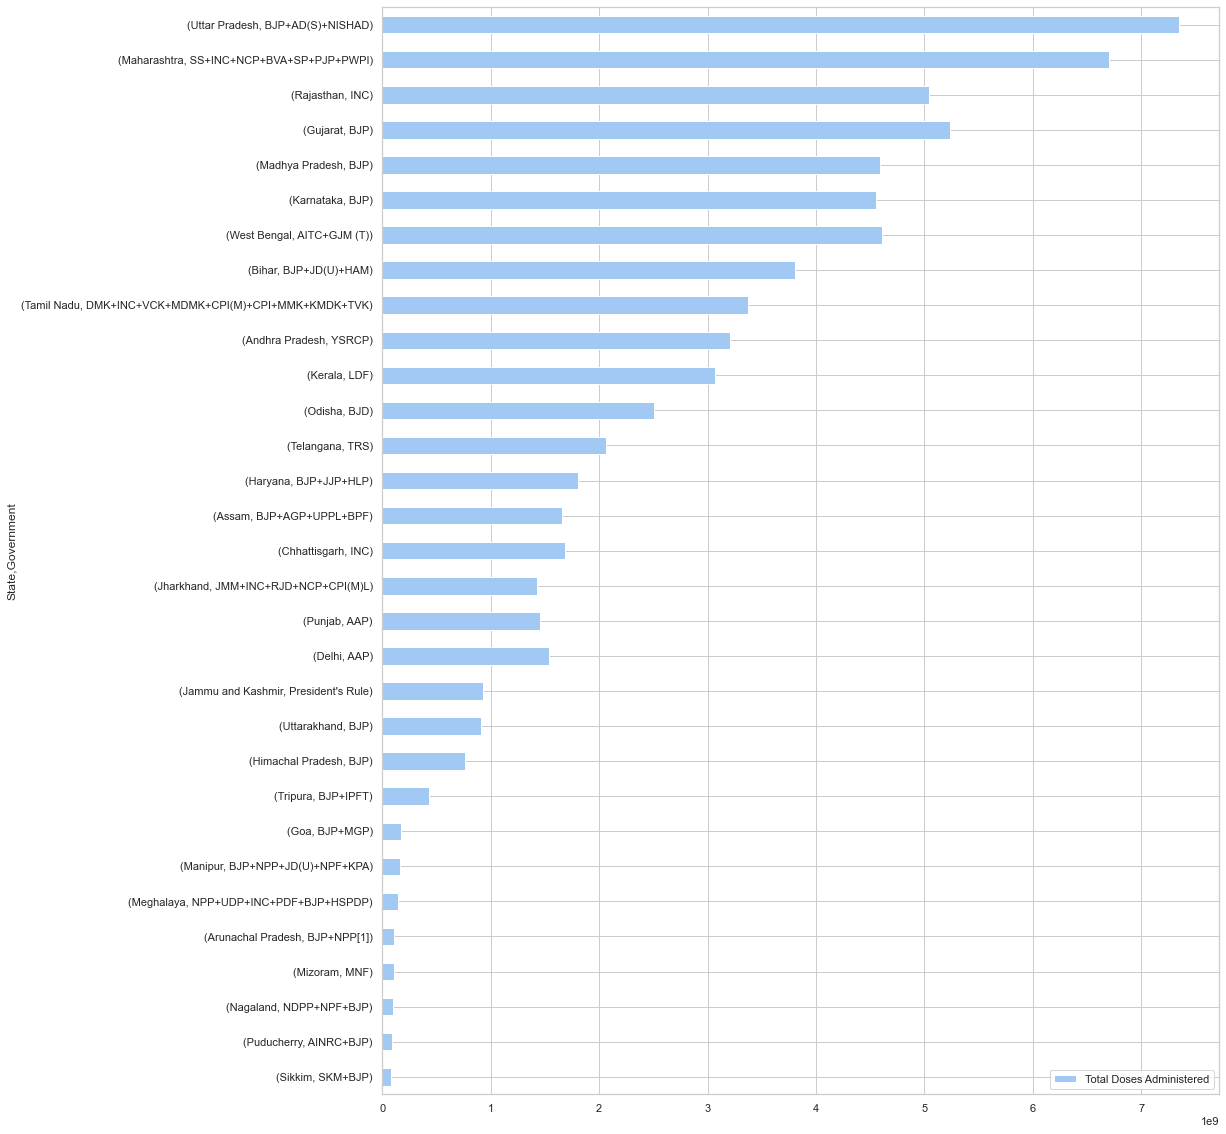

In [46]:
ruling_party_vs_vaccination.plot(kind = 'barh', figsize = (15,20))

<AxesSubplot:xlabel='Total Doses Administered', ylabel='Density'>

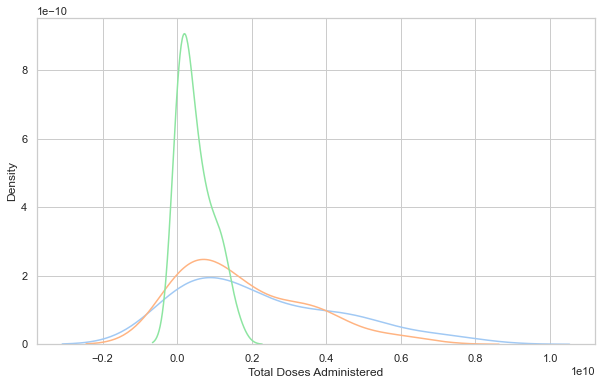

In [67]:
sns.kdeplot(x= combined['Total Doses Administered'], label = "Total Doses")
sns.kdeplot(x= combined['First Dose Administered'], label = "First Dose")
sns.kdeplot(x= combined['Second Dose Administered'], label = "Second Dose")

<AxesSubplot:xlabel='Covaxin (Doses Administered)', ylabel='Density'>

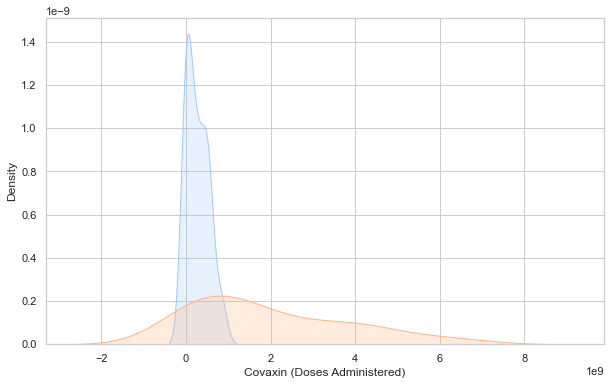

In [77]:
sns.kdeplot(x= combined['Covaxin (Doses Administered)'], label = "Covaxin", shade = True)
sns.kdeplot(x= combined['CoviShield (Doses Administered)'], label = "Covidshield", shade = True)

In [52]:
palette = sns.color_palette('hls', len(combined.color.unique()))

AttributeError: 'DataFrame' object has no attribute 'color'

In [39]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [ ]:
india_map = shp.Reader(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\IND_adm0.shp")
india_map

In [ ]:
def read_shapefile(india_map):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [ ]:
df.shape

In [ ]:
def plot_map(india_map, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in india_map.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(india_map)